In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import time, datetime
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd. read_csv('Walmart Data Analysis and Forcasting.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.isnull().any()

Store           False
Date            False
Weekly_Sales    False
Holiday_Flag    False
Temperature     False
Fuel_Price      False
CPI             False
Unemployment    False
dtype: bool

In [4]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


### How many holiday weeks are present

In [7]:
df[df['Holiday_Flag'] == 1]['Holiday_Flag'].value_counts().max()


450

#### the number of holiday weeks is 450

### The date with highest temperature


In [8]:
date_with_highest_temp=df[df['Temperature'] == df['Temperature'].max()]['Date'].values[0]
date_with_highest_temp

'16-07-2010'

### Weekly sales increase during holidays compared to non-holiday weeks

In [9]:
average_sales_holiday=df[df['Holiday_Flag'] == 1]['Weekly_Sales'].mean()
average_sales_non_holiday=df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()

print(average_sales_holiday)
print(average_sales_non_holiday)



1122887.8923555557
1041256.3802088555


#### The average weekly sale increases  during holiday weeks

In [10]:
df['Weekly_Sales']

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

### compare average weekly sales for Store 1 and Store 2

In [11]:
average_sales_store1 = df[df['Store'] == 1]['Weekly_Sales'].mean()
average_sales_store2 = df[df['Store'] == 2]['Weekly_Sales'].mean()

print(average_sales_store1)
print(average_sales_store2)

1555264.3975524476
1925751.3355244752


#### The store 2 has more average weekly sales

### Compare Average Weekly Sales for Different Stores

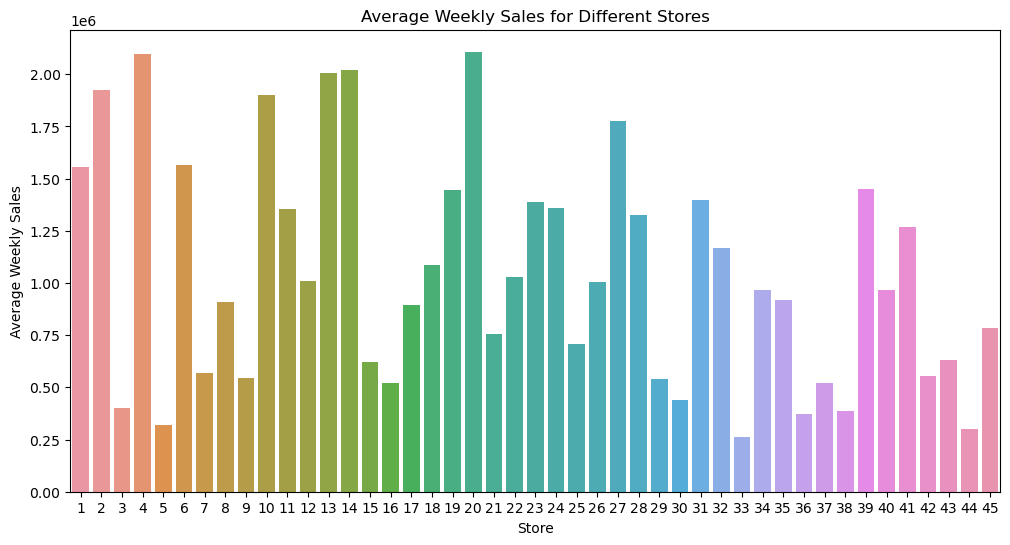

In [12]:
average_sales = df.groupby('Store')['Weekly_Sales'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=average_sales.index, y=average_sales.values)
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales for Different Stores')
plt.show()

#### Store 20 has the most average weekly sales

### Relationship between Temperature and Weekly Sales

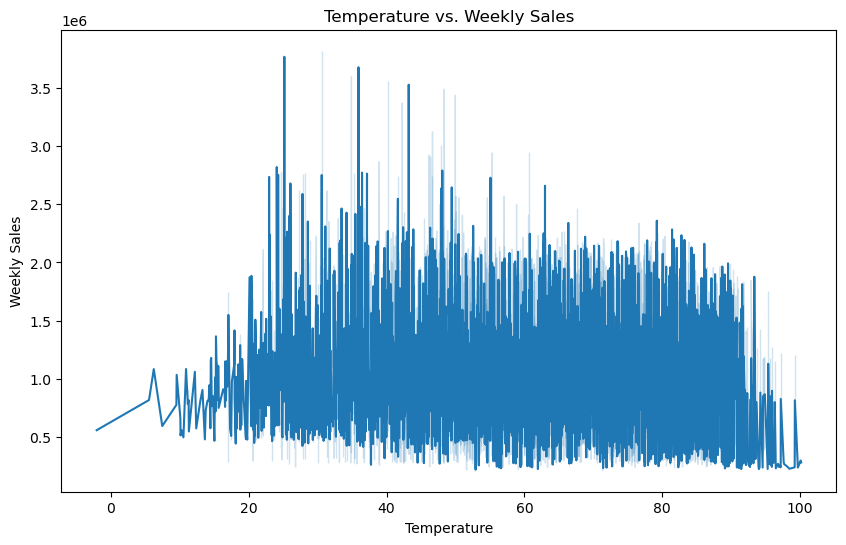

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Temperature', y='Weekly_Sales', data=df)
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Temperature vs. Weekly Sales')
plt.show()

### Store variations and Outlier analysis using BOx Plot

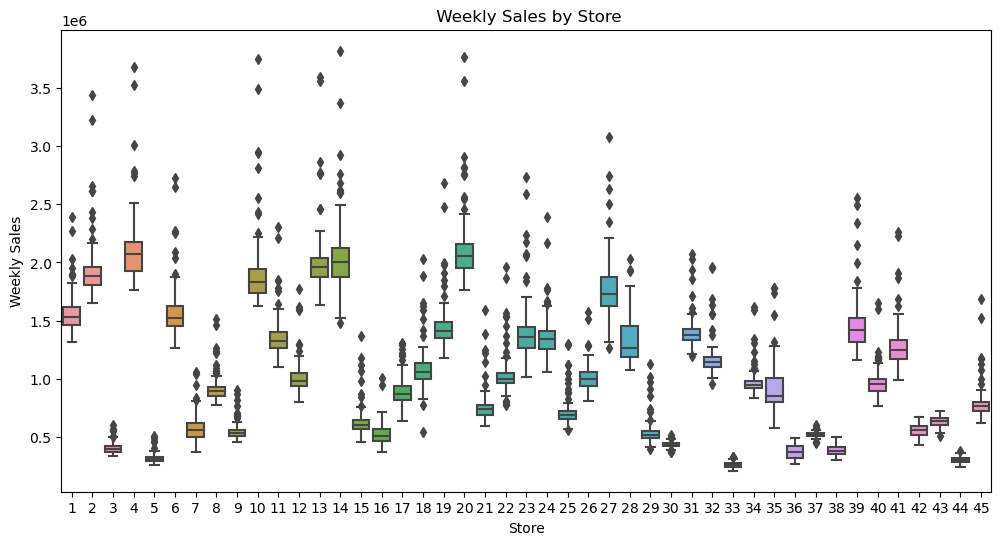

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Store', y='Weekly_Sales', data=df)
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title(' Weekly Sales by Store')
plt.show()

#### From this we can understand the outliers coresponding to each store

### Correlations Between Temperature, Fuel Prices, and Unemployment

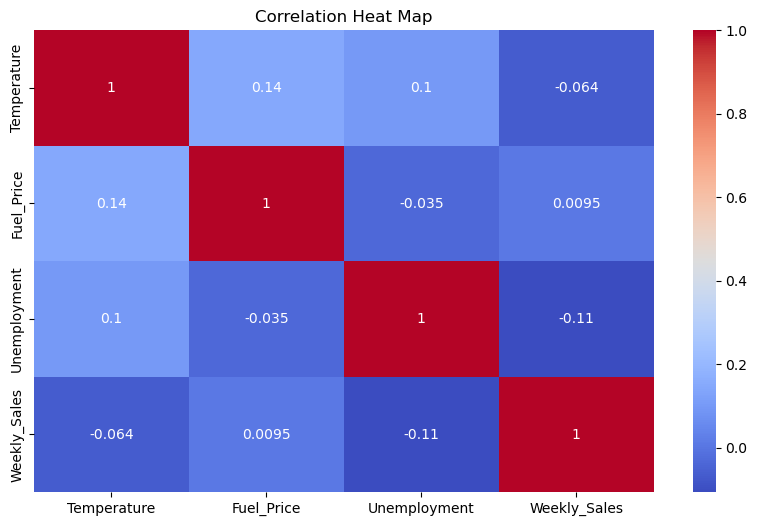

In [15]:
correlation = df[['Temperature', 'Fuel_Price', 'Unemployment', 'Weekly_Sales']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heat Map')
plt.show()

#### THis shows how each of these are correlated to one another

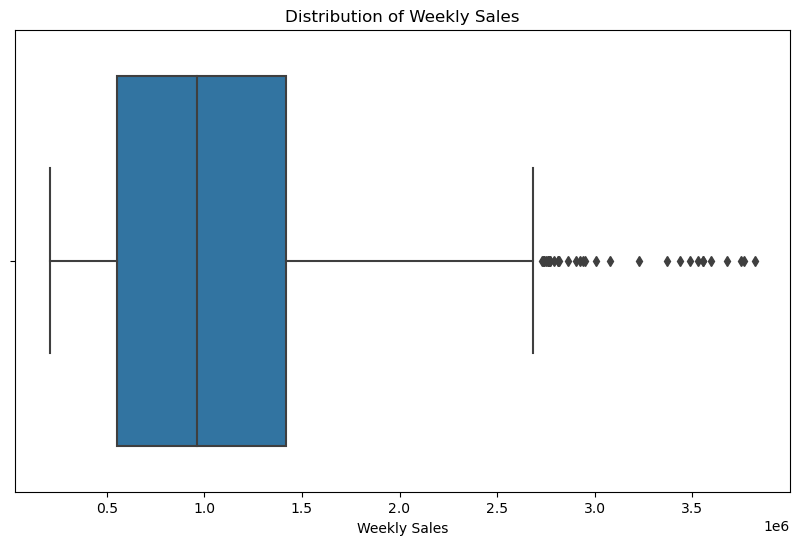

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Weekly_Sales')
plt.xlabel('Weekly Sales')
plt.title('Distribution of Weekly Sales')
plt.show()

#### This denotes that after 2.75, there exist many outliers

### Yearly sales analysis


Text(0, 0.5, 'Weekly Sales')

<Figure size 1000x600 with 0 Axes>

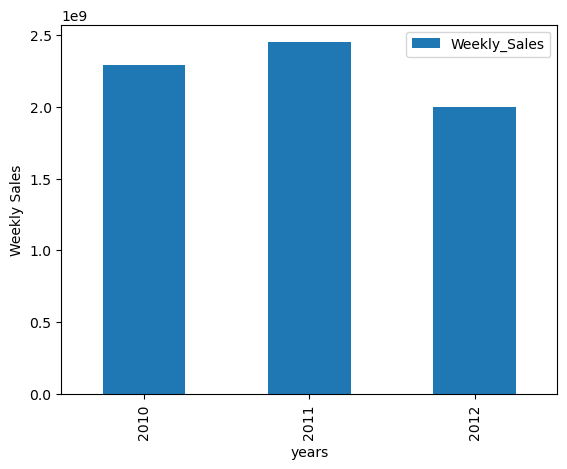

In [17]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
plt.figure(figsize=(10,6))
df.groupby("Year")[["Weekly_Sales"]].sum().plot(kind='bar')
plt.xlabel("years")
plt.ylabel("Weekly Sales")

#### THe year 2011 has the highest weekly sales

### Monthly Analysis

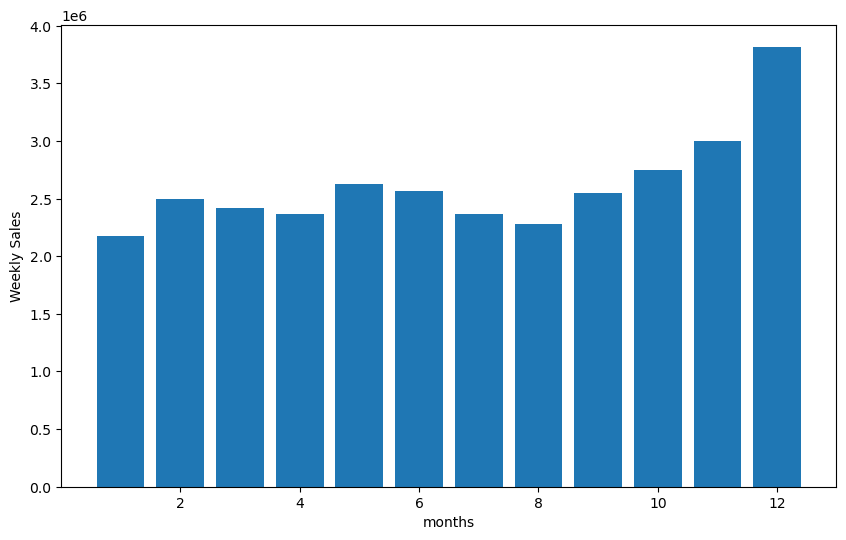

In [18]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
plt.figure(figsize=(10,6))
plt.bar(df["Month"],df["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.show()

#### most sales occur in december

### Correlation between 'Unemployment' rates and 'Weekly_Sales'

In [19]:
correlation = df['Unemployment'].corr(df['Weekly_Sales'])
print(correlation)


-0.10617608965795416


#### There is negetive correlation between unemployment and weekly sales. So, as unemployment rates increase, weekly sales also decrease.

### Do changes in 'Fuel_Price' correspond to fluctuations in 'Weekly_Sales

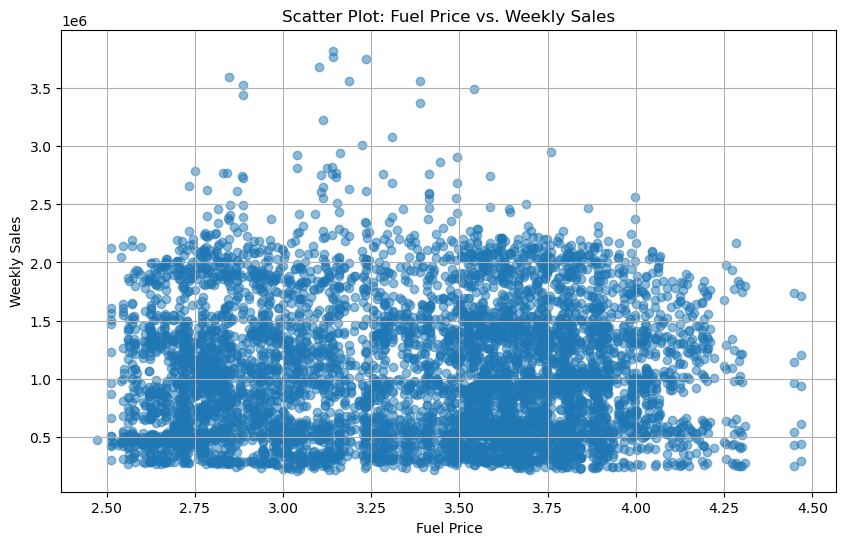

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Fuel_Price'], df['Weekly_Sales'], alpha=0.5)
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.title('Scatter Plot: Fuel Price vs. Weekly Sales')
plt.grid(True)
plt.show()

#### As fuel price increase weekly sales decrease

### Yearly fluction of Unemployment

In [21]:
yearly_unemployment = df['Unemployment'].resample('Y').mean()
plt.figure(figsize=(12, 6))
yearly_unemployment.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Mean Unemployment Rate')
plt.title('Yearly Unemployment Fluctuation')
plt.grid(True)
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

#### Unemployment decreases over time
